# Notebook A: Mechalis Menton Fitting

### Setup imports

In [1]:
import pandas as pd
from scipy.optimize import curve_fit 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
phenol_hrp_to_peroxide_ratio_df = pd.read_csv('../data/phenol_hrp_to_peroxide_ratio.csv')

phenol_hrp_to_peroxide_ratio_df

,time,0.5:1 hrp:peroxide phe 1,0.5:1 hrp:peroxide phe 2,1:1 hrp:peroxide phe 1,1:1 hrp:peroxide phe 2,2:1 hrp:peroxide phe 1,2:1 hrp:peroxide phe 2
0,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1,0.839378,0.868421,0.839378,0.891192,0.818182,0.856410
2,5,0.917098,0.794737,0.616580,0.746114,0.580808,0.676923
3,10,0.922280,0.905263,0.564767,0.683938,0.479798,0.569231
4,20,0.880829,0.889474,0.445596,0.533679,0.404040,0.435897
5,30,0.901554,0.889474,0.564767,0.497409,0.363636,0.446154
6,45,0.901554,0.873684,0.580311,0.461140,0.282828,0.353846
7,60,0.854922,0.873684,0.652850,0.419689,0.303030,0.384615
8,90,0.823834,0.847368,0.487047,0.492228,0.257576,0.317949


### Define a function for finding MM fit (without uncertainty)

In [3]:
# Define the Michaelis-Menten equation
def michaelis_menten(t, Vmax, Km):
    return 1 - Vmax * t / (Km + t)

def find_mm_fit(df, ratio): 
    # define the columns to use
    column_1, column_2 = f'{ratio} hrp:peroxide phe 1', f'{ratio} hrp:peroxide phe 2'

    time = df['time'].values
    concentration = df[[column_1, column_2]].mean(axis=1).values

    # Use curve_fit to find the best-fit parameters
    initial_guess = [1, 1]  # You can adjust these initial guesses if needed
    bounds = ([0, 0], [np.inf, np.inf])  # Vmax >= 0, Km >= 0

    params, covariance = curve_fit(michaelis_menten, time, concentration, p0=initial_guess, bounds=bounds)

    # fitted parameters
    Vmax, Km = params

    # find the fit data points
    fitted_data = michaelis_menten(time, *params)

    return Vmax, Km, fitted_data

### Generate MM fits

In [4]:
Vmax_0_5_to_1, Km_0_5_to_1, data_0_5_to_1 = find_mm_fit(phenol_hrp_to_peroxide_ratio_df, '0.5:1')
phenol_hrp_to_peroxide_ratio_df['0.5:1 MM fit'] = data_0_5_to_1

Vmax_1_to_1, Km_1_to_1, data_1_to_1 = find_mm_fit(phenol_hrp_to_peroxide_ratio_df, '1:1')
phenol_hrp_to_peroxide_ratio_df['1:1 MM fit'] = data_1_to_1

Vmax_2_to_1, Km_2_to_1, data_2_to_1 = find_mm_fit(phenol_hrp_to_peroxide_ratio_df, '2:1')
phenol_hrp_to_peroxide_ratio_df['2:1 MM fit'] = data_2_to_1

phenol_hrp_to_peroxide_ratio_df

,time,0.5:1 hrp:peroxide phe 1,0.5:1 hrp:peroxide phe 2,1:1 hrp:peroxide phe 1,1:1 hrp:peroxide phe 2,2:1 hrp:peroxide phe 1,2:1 hrp:peroxide phe 2,0.5:1 MM fit,1:1 MM fit,2:1 MM fit
0,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1,0.839378,0.868421,0.839378,0.891192,0.818182,0.856410,0.873972,0.869632,0.873952
2,5,0.917098,0.794737,0.616580,0.746114,0.580808,0.676923,0.873972,0.674988,0.628525
3,10,0.922280,0.905263,0.564767,0.683938,0.479798,0.569231,0.873972,0.600414,0.509029
4,20,0.880829,0.889474,0.445596,0.533679,0.404040,0.435897,0.873972,0.548631,0.414925
5,30,0.901554,0.889474,0.564767,0.497409,0.363636,0.446154,0.873972,0.528252,0.374994
6,45,0.901554,0.873684,0.580311,0.461140,0.282828,0.353846,0.873972,0.513613,0.345201
7,60,0.854922,0.873684,0.652850,0.419689,0.303030,0.384615,0.873972,0.505947,0.329213
8,90,0.823834,0.847368,0.487047,0.492228,0.257576,0.317949,0.873972,0.498036,0.312425


### Plot the data and MM fits

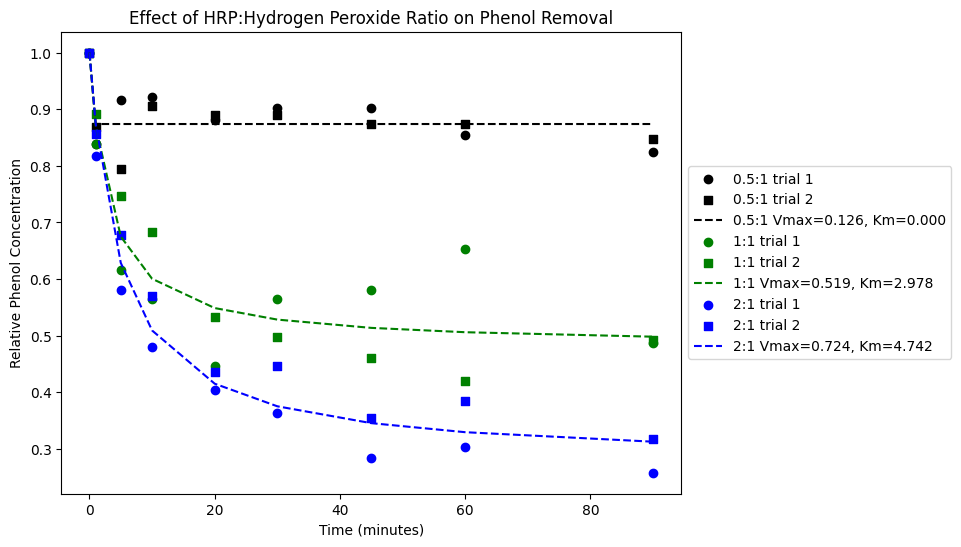

In [5]:
time = phenol_hrp_to_peroxide_ratio_df['time'].values

# Plotting the original data and the fitted curve
plt.figure(figsize=(8, 6))

# display 0.5:1 data and fit
plt.scatter(time, phenol_hrp_to_peroxide_ratio_df['0.5:1 hrp:peroxide phe 1'], color='black', label='0.5:1 trial 1')
plt.scatter(time, phenol_hrp_to_peroxide_ratio_df['0.5:1 hrp:peroxide phe 2'], color='black', marker='s', label='0.5:1 trial 2')
plt.plot(time, phenol_hrp_to_peroxide_ratio_df['0.5:1 MM fit'], color='black', linestyle='--', label=f'0.5:1 Vmax={Vmax_0_5_to_1:.3f}, Km={Km_0_5_to_1:.3f}')

# display 1:1 data and fit
plt.scatter(time, phenol_hrp_to_peroxide_ratio_df['1:1 hrp:peroxide phe 1'], color='green', label='1:1 trial 1')
plt.scatter(time, phenol_hrp_to_peroxide_ratio_df['1:1 hrp:peroxide phe 2'], color='green', marker='s', label='1:1 trial 2')
plt.plot(time, phenol_hrp_to_peroxide_ratio_df['1:1 MM fit'], color='green', linestyle='--', label=f'1:1 Vmax={Vmax_1_to_1:.3f}, Km={Km_1_to_1:.3f}')

# display 2:1 data and fit
plt.scatter(time, phenol_hrp_to_peroxide_ratio_df['2:1 hrp:peroxide phe 1'], color='blue', label='2:1 trial 1')
plt.scatter(time, phenol_hrp_to_peroxide_ratio_df['2:1 hrp:peroxide phe 2'], color='blue', marker='s', label='2:1 trial 2')
plt.plot(time, phenol_hrp_to_peroxide_ratio_df['2:1 MM fit'], color='blue', linestyle='--',  label=f'2:1 Vmax={Vmax_2_to_1:.3f}, Km={Km_2_to_1:.3f}')

plt.xlabel('Time (minutes)')
plt.ylabel('Relative Phenol Concentration')
plt.title('Effect of HRP:Hydrogen Peroxide Ratio on Phenol Removal')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Calculate the uncertainty of Vmax and Km

In [6]:
def find_mm_fit_uncertainty(df, ratio): 
    # define the columns to use
    column_1, column_2 = f'{ratio} hrp:peroxide phe 1', f'{ratio} hrp:peroxide phe 2'

    time = df['time'].values
    concentration_1 = df[[column_1]].values.flatten()
    concentration_2 = df[[column_2]].values.flatten()

    # Use curve_fit to find the best-fit parameters
    initial_guess = [1, 1]  # You can adjust these initial guesses if needed
    bounds = ([0, 0], [np.inf, np.inf])  # Vmax >= 0, Km >= 0

    params_1, covariance = curve_fit(michaelis_menten, time, concentration_1, p0=initial_guess, bounds=bounds)
    params_2, covariance = curve_fit(michaelis_menten, time, concentration_2, p0=initial_guess, bounds=bounds)

    # fitted parameters
    Vmax_1, Km_1 = params_1
    Vmax_2, Km_2 = params_2

    average_Vmax = (Vmax_1 + Vmax_2) / 2
    average_Km = (Km_1 + Km_2) / 2

    std_Vmax = np.std([Vmax_1, Vmax_2])
    std_Km = np.std([Km_1, Km_2])

    average_params = [average_Vmax, average_Km]

    # find the fit data points
    fitted_data = michaelis_menten(time, *average_params)

    return average_Vmax, average_Km, std_Vmax, std_Km, fitted_data

find_mm_fit_uncertainty(phenol_hrp_to_peroxide_ratio_df, '2:1')

(np.float64(0.7244947639850945),
 np.float64(4.834365408303331),
 np.float64(0.02526068854117669),
 np.float64(0.7945479876833672),
 array([1.        , 0.87582287, 0.63165149, 0.51161054, 0.41653853,
        0.3760517 , 0.34578751, 0.32952709, 0.31243776]))

### Generate MM fits

In [7]:
Vmax_0_5_to_1, Km_0_5_to_1, Vmax_std_0_5_to_1, Km_std_0_5_to_1, data_0_5_to_1 = find_mm_fit_uncertainty(phenol_hrp_to_peroxide_ratio_df, '0.5:1')
phenol_hrp_to_peroxide_ratio_df['0.5:1 MM fit'] = data_0_5_to_1

Vmax_1_to_1, Km_1_to_1, Vmax_std_1_to_1, Km_std_1_to_1, data_1_to_1 = find_mm_fit_uncertainty(phenol_hrp_to_peroxide_ratio_df, '1:1')
phenol_hrp_to_peroxide_ratio_df['1:1 MM fit'] = data_1_to_1

Vmax_2_to_1, Km_2_to_1, Vmax_std_2_to_1, Km_std_2_to_1, data_2_to_1 = find_mm_fit_uncertainty(phenol_hrp_to_peroxide_ratio_df, '2:1')
phenol_hrp_to_peroxide_ratio_df['2:1 MM fit'] = data_2_to_1

phenol_hrp_to_peroxide_ratio_df

,time,0.5:1 hrp:peroxide phe 1,0.5:1 hrp:peroxide phe 2,1:1 hrp:peroxide phe 1,1:1 hrp:peroxide phe 2,2:1 hrp:peroxide phe 1,2:1 hrp:peroxide phe 2,0.5:1 MM fit,1:1 MM fit,2:1 MM fit
0,0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1,0.839378,0.868421,0.839378,0.891192,0.818182,0.856410,0.873972,0.895174,0.875823
2,5,0.917098,0.794737,0.616580,0.746114,0.580808,0.676923,0.873972,0.705347,0.631651
3,10,0.922280,0.905263,0.564767,0.683938,0.479798,0.569231,0.873972,0.619134,0.511611
4,20,0.880829,0.889474,0.445596,0.533679,0.404040,0.435897,0.873972,0.553866,0.416539
5,30,0.901554,0.889474,0.564767,0.497409,0.363636,0.446154,0.873972,0.526838,0.376052
6,45,0.901554,0.873684,0.580311,0.461140,0.282828,0.353846,0.873972,0.506924,0.345788
7,60,0.854922,0.873684,0.652850,0.419689,0.303030,0.384615,0.873972,0.496325,0.329527
8,90,0.823834,0.847368,0.487047,0.492228,0.257576,0.317949,0.873972,0.485259,0.312438


### Plot the data and MM fits

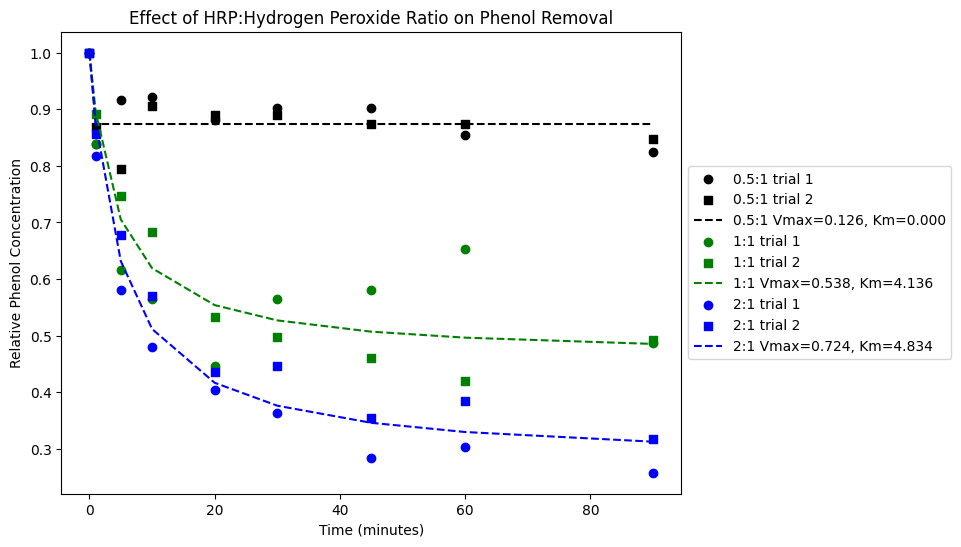

In [8]:
time = phenol_hrp_to_peroxide_ratio_df['time'].values

# Plotting the original data and the fitted curve
plt.figure(figsize=(8, 6))

# display 0.5:1 data and fit
plt.scatter(time, phenol_hrp_to_peroxide_ratio_df['0.5:1 hrp:peroxide phe 1'], color='black', label='0.5:1 trial 1')
plt.scatter(time, phenol_hrp_to_peroxide_ratio_df['0.5:1 hrp:peroxide phe 2'], color='black', marker='s', label='0.5:1 trial 2')
plt.plot(time, phenol_hrp_to_peroxide_ratio_df['0.5:1 MM fit'], color='black', linestyle='--', label=f'0.5:1 Vmax={Vmax_0_5_to_1:.3f}, Km={Km_0_5_to_1:.3f}')

# display 1:1 data and fit
plt.scatter(time, phenol_hrp_to_peroxide_ratio_df['1:1 hrp:peroxide phe 1'], color='green', label='1:1 trial 1')
plt.scatter(time, phenol_hrp_to_peroxide_ratio_df['1:1 hrp:peroxide phe 2'], color='green', marker='s', label='1:1 trial 2')
plt.plot(time, phenol_hrp_to_peroxide_ratio_df['1:1 MM fit'], color='green', linestyle='--', label=f'1:1 Vmax={Vmax_1_to_1:.3f}, Km={Km_1_to_1:.3f}')

# display 2:1 data and fit
plt.scatter(time, phenol_hrp_to_peroxide_ratio_df['2:1 hrp:peroxide phe 1'], color='blue', label='2:1 trial 1')
plt.scatter(time, phenol_hrp_to_peroxide_ratio_df['2:1 hrp:peroxide phe 2'], color='blue', marker='s', label='2:1 trial 2')
plt.plot(time, phenol_hrp_to_peroxide_ratio_df['2:1 MM fit'], color='blue', linestyle='--',  label=f'2:1 Vmax={Vmax_2_to_1:.3f}, Km={Km_2_to_1:.3f}')

plt.xlabel('Time (minutes)')
plt.ylabel('Relative Phenol Concentration')
plt.title('Effect of HRP:Hydrogen Peroxide Ratio on Phenol Removal')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('../figures/peroxide_ratio_on_phenol.png', dpi=300, bbox_inches='tight')

plt.show()

### Save the parameters and their uncertainties

In [9]:
ratio_col = ['0.5 to 1', '1 to 1', '2 to 1']
Vmax_col = [
    f'{Vmax_0_5_to_1:.4f} ± {Vmax_std_0_5_to_1:.4f}', 
    f'{Vmax_1_to_1:.4f} ± {Vmax_std_1_to_1:.4f}', 
    f'{Vmax_2_to_1:.4f} ± {Vmax_std_2_to_1:.4f}'
]

Km_col = [
    f'{Km_0_5_to_1:.4f} ± {Km_std_0_5_to_1:.4f}', 
    f'{Km_1_to_1:.4f} ± {Km_std_1_to_1:.4f}', 
    f'{Km_2_to_1:.4f} ± {Km_std_2_to_1:.4f}'
]

# Create a new DataFrame to display the results
summary_df = pd.DataFrame({'Ratio': ratio_col, 'Vmax': Vmax_col, 'Km': Km_col})

# save the summary to a csv file
summary_df.to_csv('../results/hrp_to_peroxide_ratio_params.csv', index=False)

summary_df


,Ratio,Vmax,Km
0,0.5 to 1,0.1260 ± 0.0062,0.0000 ± 0.0000
1,1 to 1,0.5384 ± 0.0646,4.1361 ± 2.6988
2,2 to 1,0.7245 ± 0.0253,4.8344 ± 0.7945
